# Недостаточная и избыточная комплектация
Отрегулируйте свою модель для повышения производительности.

В конце этого шага вы поймете концепции недостаточной и избыточной подгонки и сможете применять эти идеи для повышения точности своих моделей.

# Экспериментируйте с различными моделями
Теперь, когда у вас есть надежный способ измерения точности модели, вы можете поэкспериментировать с альтернативными моделями и посмотреть, какая из них дает наилучшие прогнозы. Но какие альтернативы у вас есть для моделей?

В документации scikit-learn вы можете увидеть, что модель дерева решений имеет множество опций (больше, чем вам захочется или потребуется в течение длительного времени). Наиболее важные опции определяют глубину дерева. Помните из первого урока этого курса, что глубина дерева - это показатель того, сколько разделений оно делает, прежде чем прийти к предсказанию. Это относительно мелкое дерево
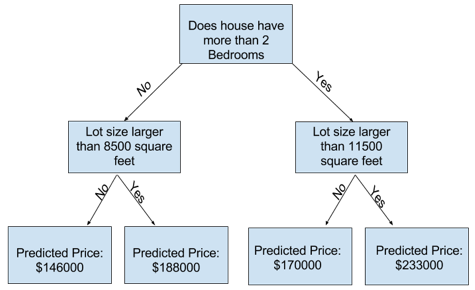

На практике нередко бывает, что дерево имеет 10 разделений между верхним уровнем (все дома) и листом. По мере того, как дерево становится глубже, набор данных разбивается на листья с меньшим количеством домов. Если бы дерево имело только 1 разделение, оно разделило бы данные на 2 группы. Если бы каждая группа была разделена снова, мы получили бы 4 группы домов. При повторном разделении каждой из них было бы создано 8 групп. Если мы продолжим удваивать количество групп, добавляя больше разделений на каждом уровне, у нас получится  
2
. 10
групп домов к тому времени, как мы доберемся до 10-го уровня. Это 1024 листа.

Когда мы распределяем дома по нескольким листьям, у нас также остается меньше домов на каждом листе. Листы с очень небольшим количеством домов дают прогнозы, которые довольно близки к фактическим значениям этих домов, но они могут давать очень ненадежные прогнозы для новых данных (поскольку каждый прогноз основан только на нескольких домах).

Это явление называется переоснащением, когда модель почти идеально соответствует обучающим данным, но плохо поддается проверке и другим новым данным. С другой стороны, если мы сделаем наше дерево очень мелким, оно не разделит дома на четко выраженные группы.

В крайнем случае, если дерево делит дома только на 2 или 4 группы, в каждой группе все равно будет большое разнообразие домов. Результирующие прогнозы для большинства домов могут быть неточными даже в обучающих данных (и по той же причине они будут плохими при проверке). Когда модели не удается отразить важные различия и закономерности в данных, из-за чего она плохо работает даже при обучении, это называется недостаточной адаптацией.

Поскольку мы заботимся о точности новых данных, которые мы оцениваем на основе наших валидационных данных, мы хотим найти золотую середину между недостаточным и избыточным соответствием. Визуально нам нужна нижняя точка (красная) кривой валидации на рисунке ниже.
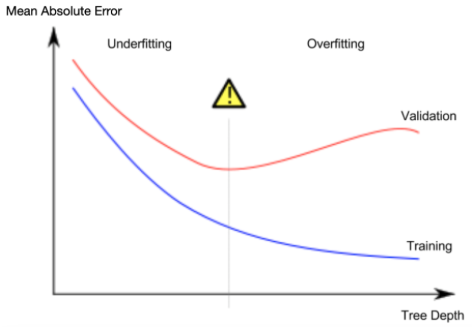

# Пример¶
Существует несколько альтернатив для управления глубиной дерева, и многие из них допускают, что некоторые маршруты по дереву имеют большую глубину, чем другие маршруты. Но аргумент max_leaf_nodes предоставляет очень разумный способ управления переобучением и недоподготовкой. Чем больше отклонений мы позволяем модели делать, тем больше мы переходим от области недостаточного соответствия на приведенном выше графике к области избыточного соответствия.

Мы можем использовать полезную функцию, которая поможет сравнить оценки MAE по различным значениям для max_leaf_nodes:

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Данные загружаются в train_X, val_X, train_y и val_y с использованием кода, который вы уже видели (и который вы уже написали).

In [ ]:
# На Этом Этапе Выполняется Код Загрузки Данных
import pandas as pd
    
# Загрузить данные
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Отфильтровать строки с пропущенными значениями
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Выберите цель и функции
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# разделите данные на обучающие и проверочные, как для функций, так и для целевых объектов.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

Мы можем использовать цикл for для сравнения точности моделей, построенных с различными значениями для max_leaf_nodes.

In [ ]:
# сравнить MAE с различными значениями max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Из перечисленных вариантов 500 - это оптимальное количество листьев.

# Вывод
Вот вывод: модели могут страдать от того или иного:

Переоснащение: выявление ложных закономерностей, которые не повторятся в будущем, что приводит к менее точным прогнозам, или
недостаточное переоснащение: неспособность уловить соответствующие закономерности, что снова приводит к менее точным прогнозам.
Мы используем данные проверки, которые не используются при обучении модели, для оценки точности модели-кандидата. Это позволяет нам перепробовать множество моделей-кандидатов и выбрать лучшую.

# ваш ход
Попробуйте оптимизировать ранее созданную вами модель.